In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [100]:
def import_covid19_data():
    '''
    Import covid19 data from 2019 Novel Coronavirus COVID-19 (2019-nCoV) 
    Data Repository by Johns Hopkins CSSE and output confirmed cases, deaths,
    and recovered cases into three pandas dataframes.
    '''
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master'\
    +'/csse_covid_19_data/csse_covid_19_time_series/'
    conf = 'time_series_19-covid-Confirmed.csv'
    death = 'time_series_19-covid-Deaths.csv'
    recov = 'time_series_19-covid-Recovered.csv'
    
    confirmed = pd.read_csv(url + conf)
    deaths = pd.read_csv(url + death)
    recov = pd.read_csv(url + recov)
    
    return confirmed, deaths, recov
    
def cumsum_timeseries_plot(dataframes, labels, size):
    plt.figure(figsize=size)
    
    for dataframe in dataframes:
        plt.plot(dataframe.sum())
        
    plt.legend(labels)
    plt.xlabel("Date")
    plt.ylabel("Population Count")
    plt.xticks(rotation=45)
    
def diff_plot(dataframes, labels, size):
    bar_width = 0.5
    next_width = 0
    
    plt.figure(figsize=size)
    
    for dataframe in dataframes:
        df = dataframe.diff(axis='columns')
        columns = df.columns
        num_columns = np.arange(0, len(columns)*2, 2)
        plt.bar(num_columns + next_width, df.sum(), bar_width)
        next_width = next_width + bar_width
        
    plt.legend(labels)
    plt.xlabel("Date")
    plt.ylabel("Population Count")
    plt.xticks(num_columns, columns, rotation=45)

In [88]:
confirmed, deaths, recovered = import_covid19_data()

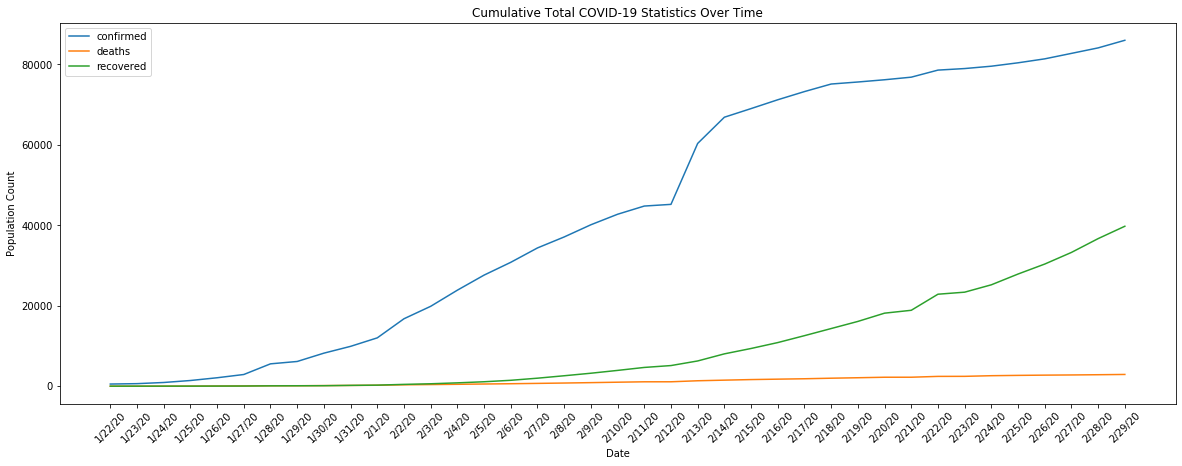

In [105]:
cumsum_timeseries_plot([confirmed.loc[:,"1/22/20":], 
                        deaths.loc[:,"1/22/20":], 
                        recovered.loc[:,"1/22/20":]], 
                        ["confirmed", "deaths", "recovered"],
                        [20,7])
plt.title("Cumulative Total COVID-19 Statistics Over Time");

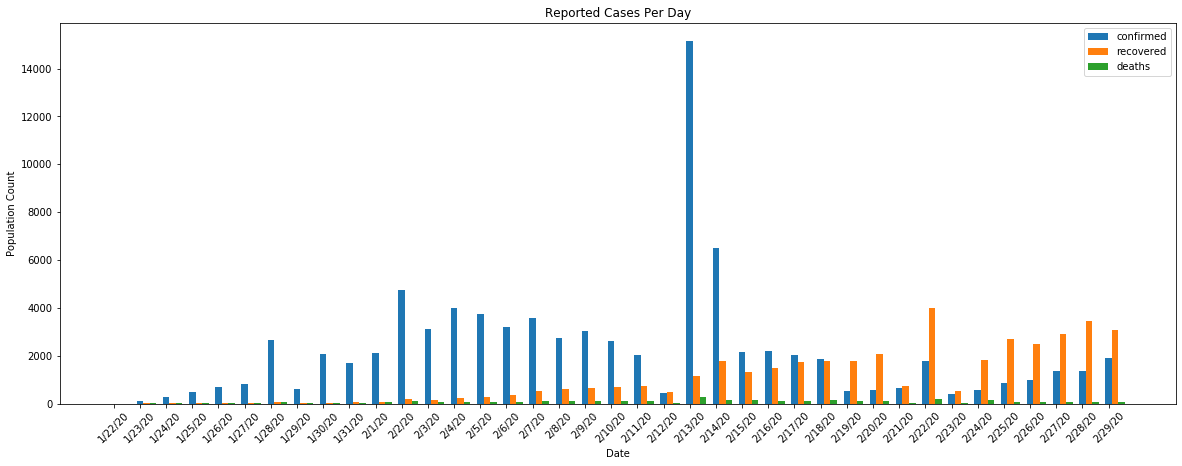

In [103]:
diff_plot([confirmed.loc[:,"1/22/20":], 
           recovered.loc[:,"1/22/20":],
           deaths.loc[:,"1/22/20":]], 
           ["confirmed", "recovered", "deaths"],
           [20,7])
plt.title("Reported Cases Per Day");

In [97]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])